# K-최근접 회귀를 이용한 농어 데이터 예측
#### 목표: 
1. 농어 데이터를 받아와, K-최근접 이웃 회귀 알고리즘을 이용해, 예측을 하고 과소적합과 과대적합을 판단하여 가능한 높은 점수를 얻는다.
2. 과소적합과 과대적합 판단에 대한 근거를 찾는다
3. K-최근접 이웃 회귀 알고리즘에 대한 이해 및 실습

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# data handling을 위해, numpy를 import
# data visualization 위해, matplotlib를 import
# model 생성을 위해, sklearn을 import

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )
# 농어 데이터셋 설정

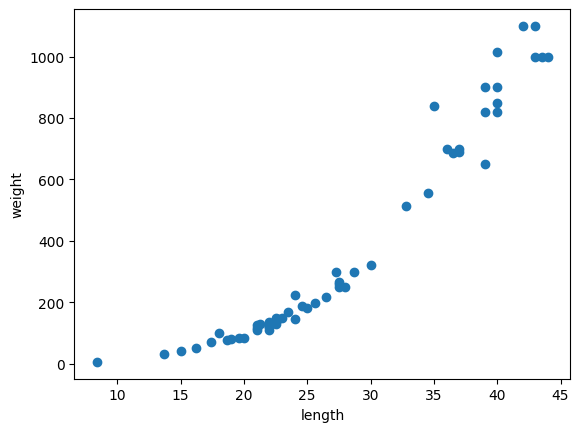

In [2]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 농어의 길이, 무게를 시각화

In [3]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length,
    perch_weight,
    random_state=42
    )
# 농어의 RAW 데이터를 train, test 데이터셋으로 분리한다.

# train_test_split의 파라미터
# 1. X dataset
# 2. Y dataset
# 3. random_state: dataset을 무작위로 섞을 때, 그 기준이 되는 seed
# 4. shuffle: 데이터셋을 섞을지 여부
# 5. stratify: y 데이터셋의 클래스 비율을 동일하게 만들지 여부

In [4]:
print(train_input.shape, test_input.shape)

(42,) (14,)


현재 dataset은 42, 14 크기의 **1차원 튜풀**로 이루어져 있다.
하지만 K-최근접 이웃 회귀 알고리즘을 이용하기 위해, 2차원 배열이 필요하기에 이를 변환해야 한다.

In [5]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
# -1은 나머지 차원을 모두 채우라는 의미이다.
# 이를 이용하면, reshape를 시도할 때마다, 전체 원소의 개수를 알고있지 않아도 된다.
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


이제 K-최근접 이웃 회귀 알고리즘을 사용할 준비가 되었다. 실제로 모델을 생성 후, 학습을 진행하자

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
# 모델을 학습시킨다.

KNeighborsRegressor()

In [8]:
knr.score(test_input, test_target)
# 현재 모델의 성능을 평가한다.

0.992809406101064

현재 모델의 성능은 약 0.99로 좋은 점수가 나온다.
만약 이 모델이 분류였다면 어땠을까?
***
### 회귀와 결정 계수
분류에서는 test dataset의 샘플을 정확하게 분류한 개수의 비율이기에, 이를 정확도라 볼 수 있었다.
하지만 회귀에서는 정확한 숫자를 맞히는 것이 거의 불가능하기에 다른 기준으로 점수를 주는데, 이를 결정 계수라고 부른다.

**결정계수 수식**
$$
R^2 = {1 - sum(X - P) \over sum(X - A)}
$$
$$
X = 예측하려는 값, 
A = 평균, 
P = 예측, 
$$
으로 구할 수 있다.

위 공식을 통해 본다면, X와 P의 값이 작아질수록 분자가 0에 가까워지기 때문에, 결정계수가 1에 가까워질수록 더 정확한 예측이라고 볼 수 있습니다.

하지만, 직관적으로 어느정도로 예측이 벗어나는지 알 수 없기에 다음 모듈을 이용해 예측과 얼마나 벗어났는지를 알아보겠습니다.

In [9]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)
# mae 함수를 이용해, 실제값과 예측값의 차이를 계산한다.

# Mean Absolute Error: 실제값과 예측값의 차이의 절댓값의 평균
# avg(X-P)라고 볼 수 있음

19.157142857142862


결과적으로 평균과 19g 정도 예측에서 벗어났음을 알 수 있습니다.

## 과소적합과 과대적합
훈련 데이터로 학습을 하는 경우, 보통 훈련 데이터에 잘 맞는  모델이 만들어집니다.

이 때, 훈련 데이터에서는 점수가 좋았는데, 테스트 데이터에서 점수가 낮다면 이를 **과대적합**이라고 표현합니다.

이럴 경우, 나중에 실전에서 예측을 할 경우에는 모델의 정확도가 떨어지게 됩니다.

그렇다면 **과소적합**은 무엇일까요?

**과소적합** 훈련과 테스트 두 점수가 모두 낮은 경우나, 테스트 데이터의 점수가 훈련 데이터보다 더 높을 경우에 과소적합이 되었다고 봅니다.

이는 훈련 데이터가 적거나, 너무 단순해서 모델의 훈련이 실패함을 의미합니다.

그렇다면 이 모델에서는 어떤 적합이 나왔을지 알아보겠습니다.

In [10]:
print(f'train: {knr.score(train_input, train_target)}')
print(f'test: {knr.score(test_input, test_target)}')
# 훈련 데이터의 점수가 테스트 데이터의 점수보다 높아, 과소적합 모델로 판단

train: 0.9698823289099254
test: 0.992809406101064


훈련 데이터의 점수가 더 높은 걸로 보아, 이 모델은 과소적합 모델입니다.

그렇다면 이를 해결하기 위해서는 어떻게 해야할까요?

과소적합의 이유는 모델이 단순하기 때문입니다.

K-최근접 이웃 알고리즘의 모델을 더욱 복잡하기 만들기위해선, 이웃을 줄여야 합니다.

K-최근접 이웃 알고리즘의 이웃 개수의 기본값은 5이므로, 이 값을 3으로 줄여 다시 훈련해봅시다.

In [11]:
knr.n_neighbors = 3
# 이웃의 수: 5 -> 3

knr.fit(train_input, train_target)
# 학습

print(f'train: {knr.score(train_input, train_target)}')
print(f'test: {knr.score(test_input, test_target)}')
# 차이가 줄어든 것을 알 수 있음

train: 0.9804899950518966
test: 0.9746459963987609


테스트 데이터의 점수가 훈련 데이터의 점수보다 높아졌으며, 이 차이가 크지 않으므로 적당한 모델이 되었습니다.

한 번 예측을 해볼까요?

In [12]:
x1 = 23
x2 = 46
p1 = knr.predict([[x1]])
p2 = knr.predict([[x2]])

print(p1)
print(p2)
# 23cm와 46cm 농어의 무게를 예측

[155.]
[1033.33333333]


이 예측값을 시각화를 통해 비교해봅시다.

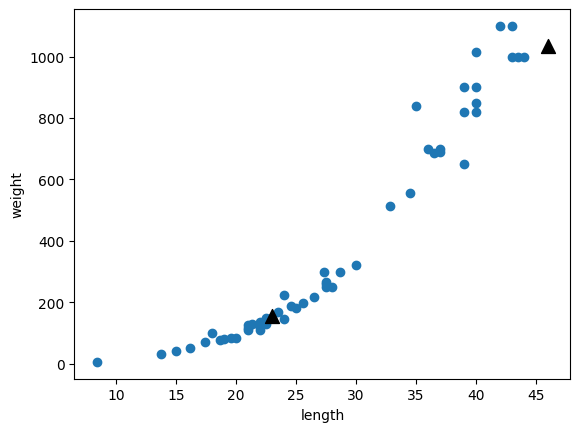

In [13]:
plt.scatter(perch_length, perch_weight)
plt.scatter(x1, p1, c = 'black', marker='^', s=100)
plt.scatter(x2, p2, c = 'black', marker='^', s=100)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 예측값을 빨간 점으로 찍어서 시각화

예측이 잘 되는 모습입니다.

추가적으로 과소/과대 적합을 판단하기 위해 이웃을 늘이고 줄인 것을 그래프를 통해서 확인해보겠습니다.

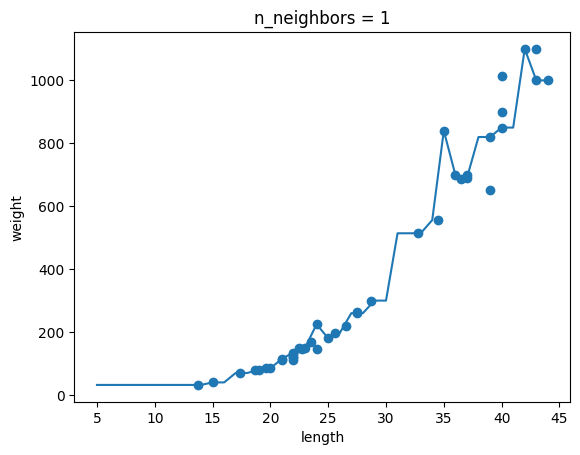

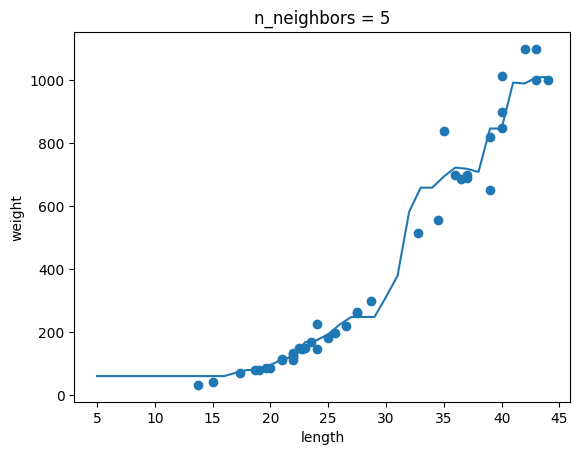

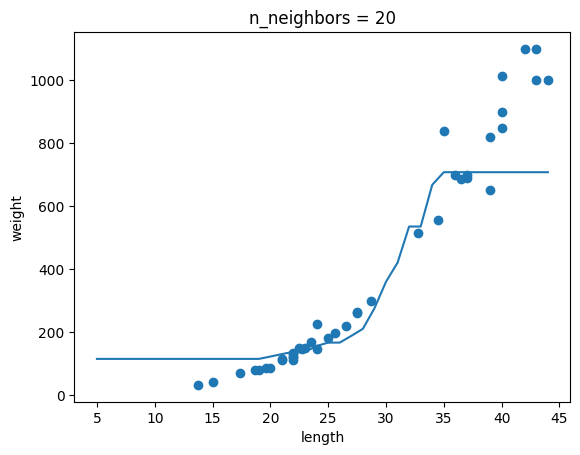

In [14]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 20]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    
    plt.plot(x, prediction)
    # (x, y)의 점들을 직선으로 연결해줍니다.
    
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

이웃의 수에 따라 과소, 과대 적합이 나타남을 확인할 수 있었습니다.